In [11]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data from Github

In [12]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [13]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [25]:
countries = [
'Finland',
'France',
'Germany',
'Italy',
'Portugal',
'Spain',
'Sweden',
'Switzerland',
'United Kingdom'
]

countries = [
'France'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [41]:
lockdown_list = [
{
        'name': 'First Lockdown',
        'start_date': datetime.strptime('03/17/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('05/10/2020','%m/%d/%Y'),
        'color': 'red'
    },{
        'name': 'Second Lockdown',
        'start_date': datetime.strptime('10/30/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('12/14/2020','%m/%d/%Y'),
        'color': 'red'
    },{
        'name': 'Couvre feu 20h',
        'start_date': datetime.strptime('10/17/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('10/30/2020','%m/%d/%Y'),
        'color': 'orange'
    },{
        'name': 'Couvre feu 20h',
        'start_date': datetime.strptime('12/14/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('01/27/2021','%m/%d/%Y'),
        'color': 'orange'
    }
]

In [42]:
def plot_serie(column_name):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)
    
    fig, ax = plt.subplots()
    for lockdown in lockdown_list:
        ax.axvspan(lockdown['start_date'], lockdown['end_date'], alpha=0.3, color=lockdown['color'])

    for key, grp in covid_data_df.groupby(['location']): 
        ax.set_xlabel('Date')
        ax.set_ylabel('new_deaths_smoothed_per_million', color='red')
        ax.plot(grp['date'], grp['new_deaths_smoothed_per_million'], color='red')
        ax.tick_params(axis='y', labelcolor='red')
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel('new_cases_smoothed_per_million', color='blue')
        ax2.plot(grp['date'], grp['new_cases_smoothed_per_million'], color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')

    
    fig.tight_layout()
    plt.xlabel('Date', fontsize=16)

    plt.show()

## Plot death and cases against lockdowns

The <span style="color:red">red</span> curve is the number of death per million
The <span style="color:blue">blue</span> curve is the number of case per million

<span style="color:red">Red</span> areas correspond to the complete lockdowns, while <span style="color:orange">orange</span> one match curfews.

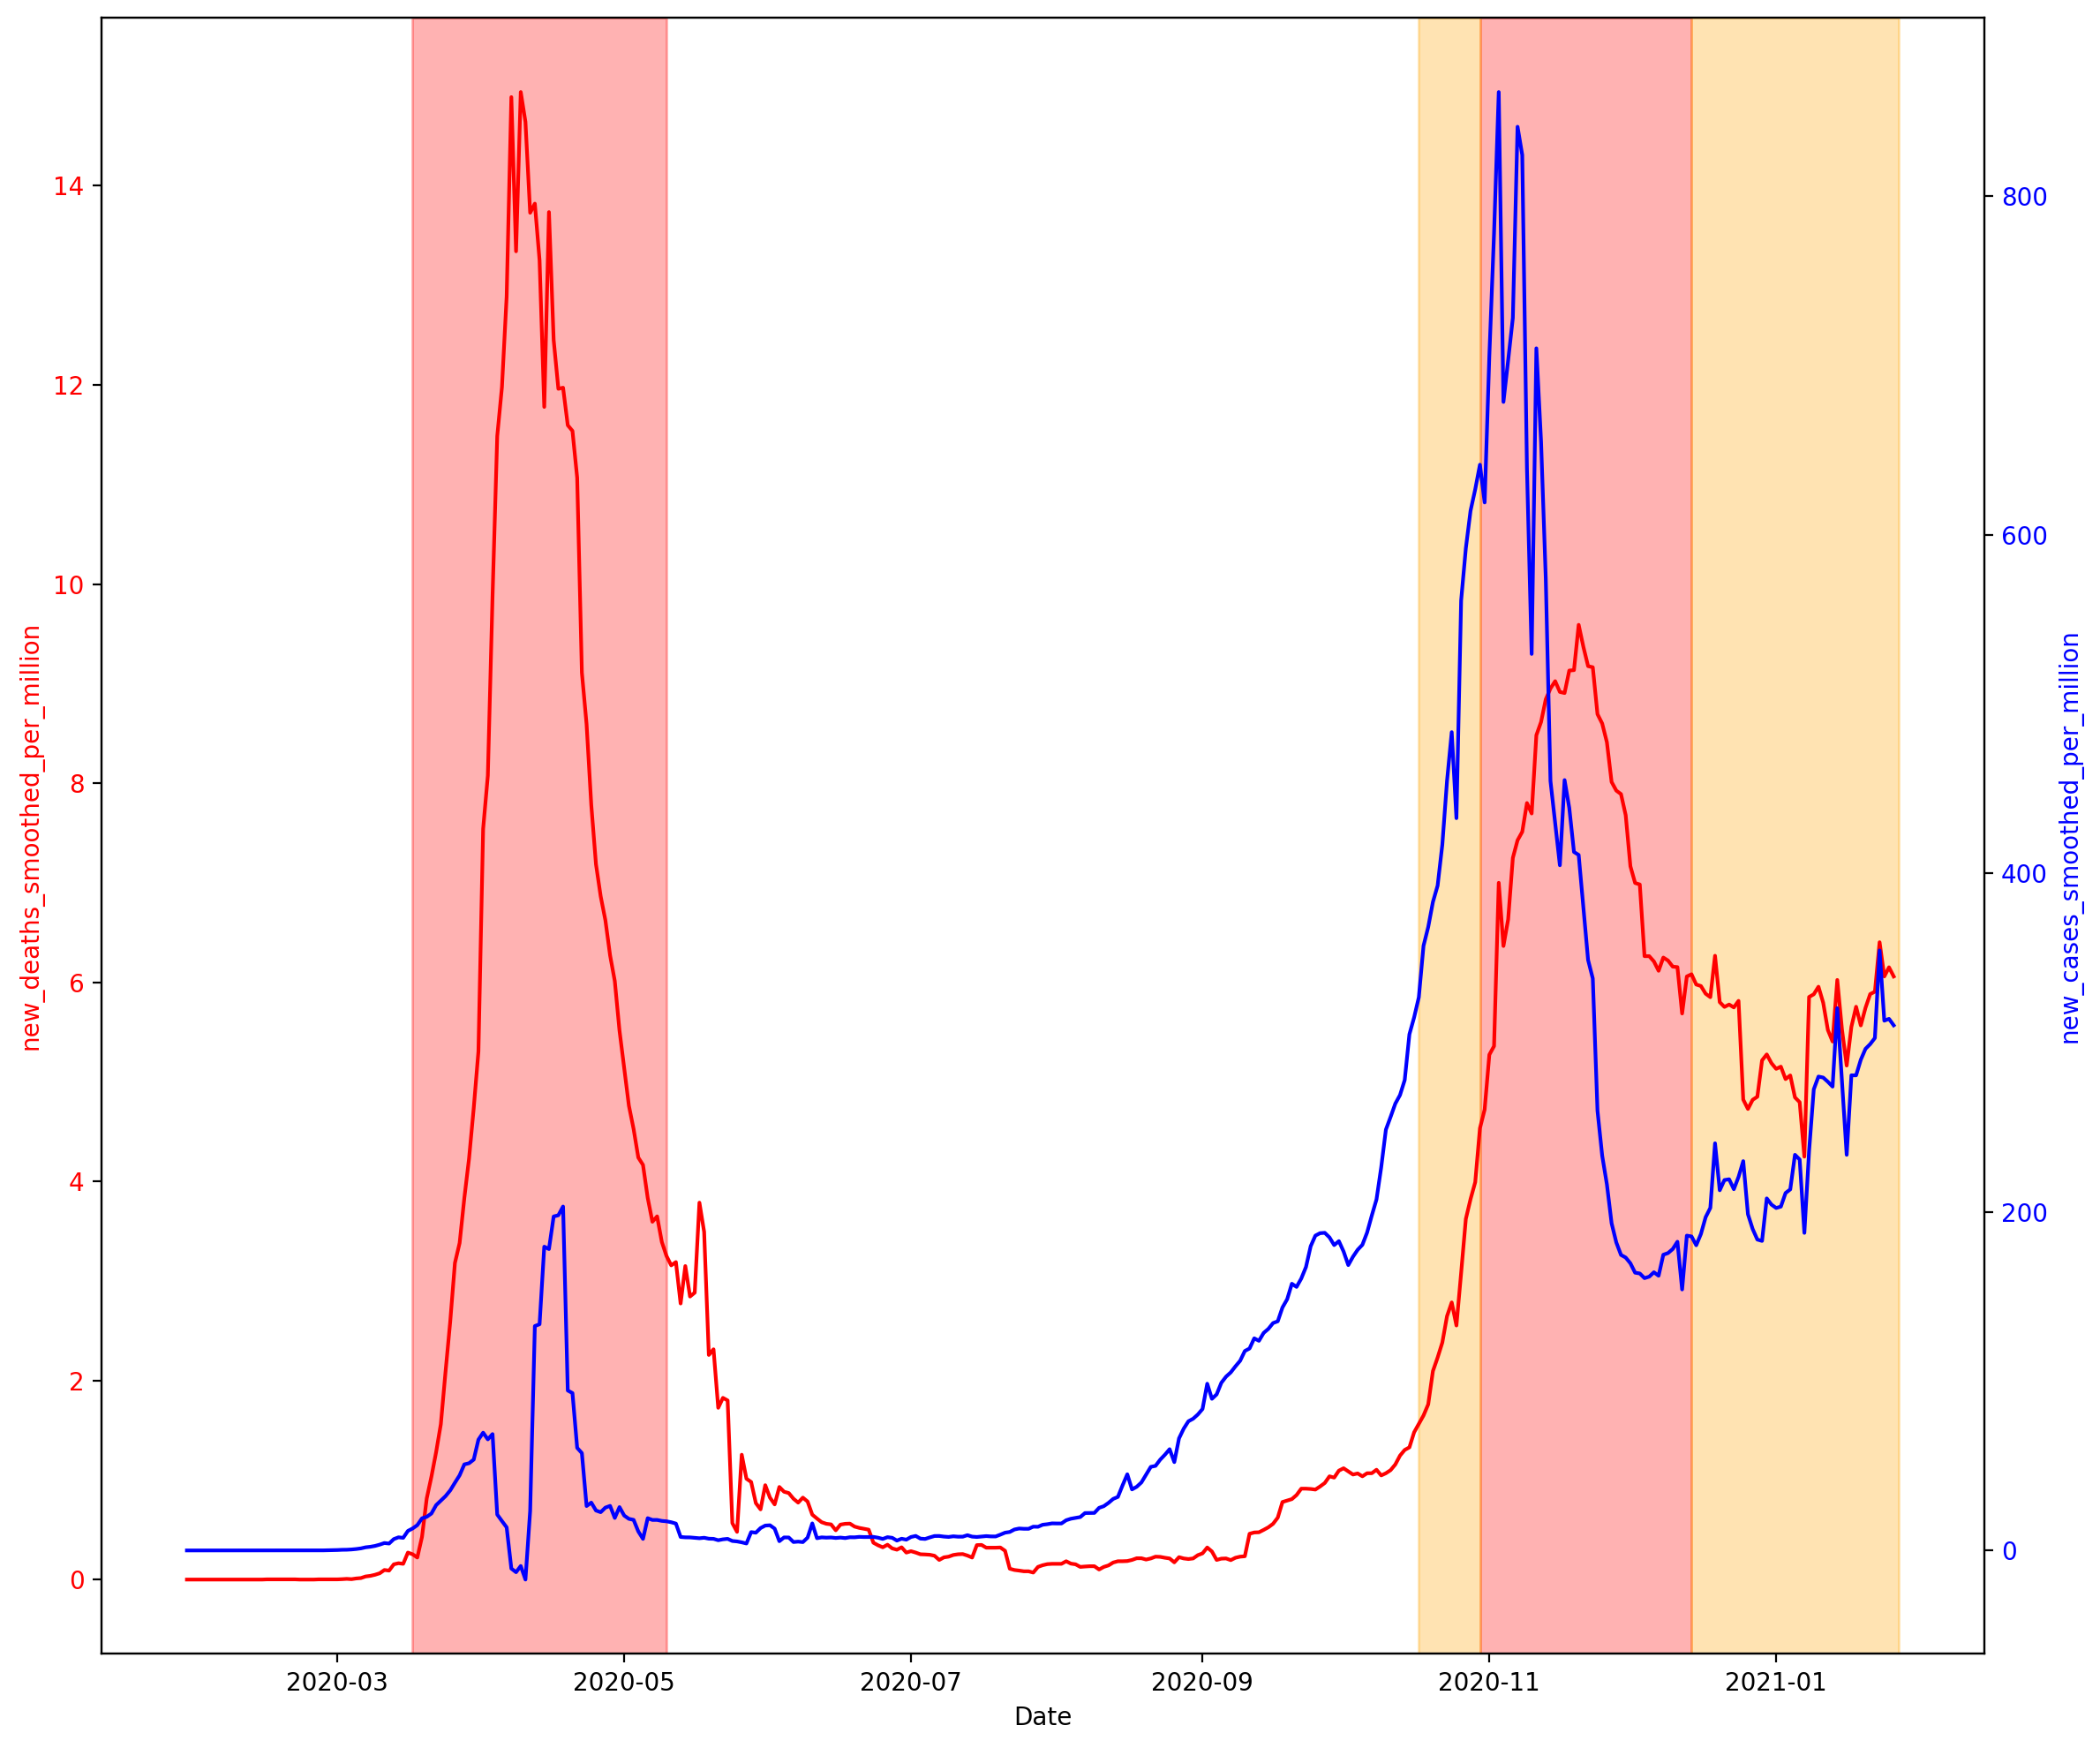

In [43]:
column_name = 'new_cases_smoothed_per_million'
plot_serie(column_name)